# Prepare data from google

Data is prepared from google images and all csv files are present in Animal folder. The data has 7 animal images - 
1. Lion
2. Tiger
3. dog
4. Elephant
5. Kangaroo
6. Zebra 
7. horse

In [0]:
import os
from fastai.vision import *

# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [0]:


folders = ['dog','elephant','horse','kangaroo','lion','tiger','zebra']
csv_files = ['dog.csv','elephants.csv','horse.csv','kangaroo.csv','lion.csv','tiger.csv','zebra.csv']


In [0]:
for i in range(0,len(folders)):
  folder = folders[i]
  path = Path('Animals')
  dest = path/folder
  dest.mkdir(parents=True, exist_ok=True)
  file = csv_files[i]
  download_images(path/file, dest, max_pics=200)


Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '': No schema supplied. Perhaps you meant http://?
Error  Invalid URL '

In [0]:
classes = ['dog','elephant','horse','kangaroo','lion','tiger','zebra']


In [0]:
X=[]
Z=[]
IMG_SIZE=150


In [0]:
def assign_label(img,flower_type):
    return flower_type

In [0]:
def make_train_data(animal_type,DIR):
    files = [file for file in os.listdir(DIR) if(not file.startswith('.'))] 
    for img in tqdm(files):
        label=assign_label(img,animal_type)
        path = os.path.join(DIR,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
       
        if os.path.exists(path) or img != None:
          if not img.size == 0:
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))
        Z.append(str(label))

In [0]:
for i in range(0,len(classes)):
  DIR = 'Animals/'+classes[i]
  make_train_data(classes[i],DIR)
  print(len(X))

  0%|          | 0/160 [00:00<?, ?it/s]

160
320


  0%|          | 0/80 [00:00<?, ?it/s]

480
640


 61%|██████▏   | 98/160 [00:00<00:00, 972.25it/s]

720
800


100%|██████████| 160/160 [00:00<00:00, 940.67it/s]

960


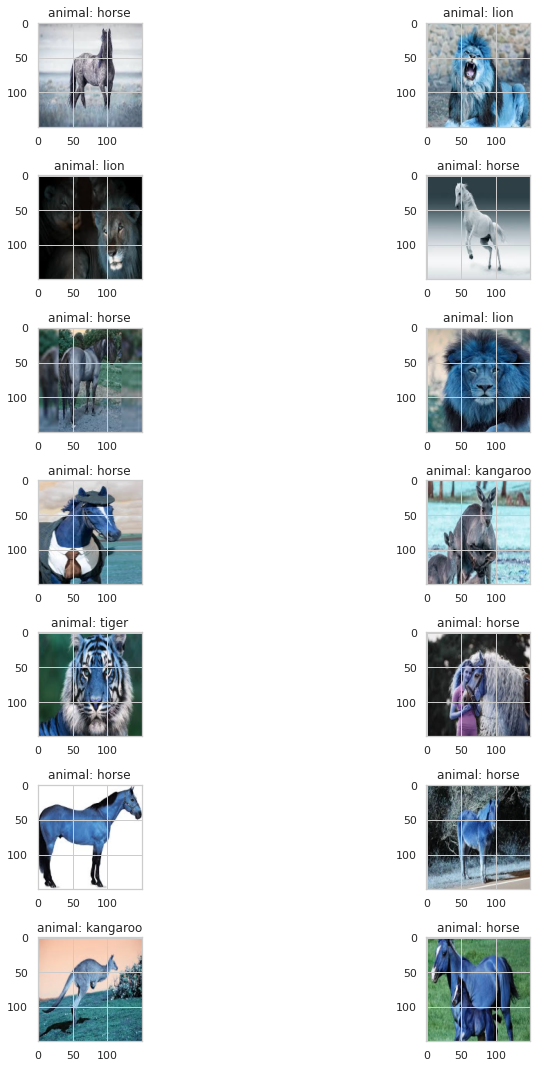

In [0]:
fig,ax=plt.subplots(7,2)
fig.set_size_inches(15,15)
for i in range(7):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('animal: '+Z[l])
        
plt.tight_layout()

# Prepare data for training

In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
Y=to_categorical(Y,7)
X=np.array(X)
X=X/255

print( Y.shape)

(960, 7)


In [0]:
le=LabelEncoder()
Y=le.fit_transform(Z)
print( Y.shape)

(960,)


In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [0]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(720, 150, 150, 3)
(720,)
(240, 150, 150, 3)
(240,)


In [0]:
# building the input vector from the 28x28 pixels

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# print the final input shape ready for training
print("Train matrix shape", X_train.shape)
print("Test matrix shape", X_test.shape)

Train matrix shape (720, 150, 150, 3)
Test matrix shape (240, 150, 150, 3)


In [0]:

model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(7, activation = "softmax"))

In [0]:
batch_size=128
epochs=50

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

# Data Augmentation

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

# Sparse Categorical cross entropy loss

In [0]:
model.compile(
            optimizer=Adam(lr=0.001),
            loss='sparse_categorical_crossentropy',
            metrics=['sparse_categorical_accuracy'])

In [0]:
model.summary()


Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 150, 150, 32)      2432      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 75, 75, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 75, 75, 64)        18496     
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 37, 37, 64)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 37, 37, 96)        55392     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 18, 18, 96)        0         
_________________________________________________________________
conv2d_35 (Conv2D)           (None, 18, 18, 96)      

In [0]:
History =  model.fit(X_train, Y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(X_test, Y_test))


Train on 720 samples, validate on 240 samples
Epoch 1/50
720/720 [==============================] - 37s 51ms/step - loss: 1.9348 - sparse_categorical_accuracy: 0.1625 - val_loss: 1.8933 - val_sparse_categorical_accuracy: 0.1625
Epoch 2/50
720/720 [==============================] - 37s 51ms/step - loss: 1.9167 - sparse_categorical_accuracy: 0.1708 - val_loss: 1.9105 - val_sparse_categorical_accuracy: 0.1583
Epoch 3/50
720/720 [==============================] - 36s 51ms/step - loss: 1.9183 - sparse_categorical_accuracy: 0.1694 - val_loss: 1.8962 - val_sparse_categorical_accuracy: 0.1583
Epoch 4/50
720/720 [==============================] - 36s 51ms/step - loss: 1.9153 - sparse_categorical_accuracy: 0.1611 - val_loss: 1.8988 - val_sparse_categorical_accuracy: 0.1625
Epoch 5/50
720/720 [==============================] - 36s 51ms/step - loss: 1.9146 - sparse_categorical_accuracy: 0.1681 - val_loss: 1.9050 - val_sparse_categorical_accuracy: 0.1625
Epoch 6/50
720/720 [========================

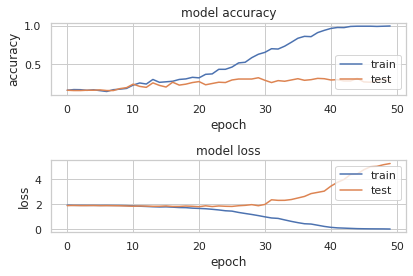

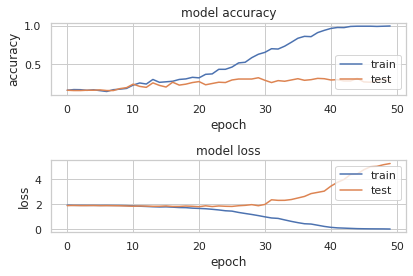

In [0]:
# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(History.history['sparse_categorical_accuracy'])
plt.plot(History.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

fig